In [42]:
#importing important liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx
#from py2neo import Graph, Node, Relationship,DatabaseError
import time
import utils
from sklearn.preprocessing import MinMaxScaler
import Data_Reduction

import Graph_Exploration
import plotly as px
import plotly.graph_objects as go
from collections import defaultdict

In [65]:
nodes, edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
#nodes.head()
graph = utils.Create_Graph(nodes,edges)

In [107]:
nodes_our_community = pd.read_csv('nodes_with_all_communities.csv')
nodes_our_community.head()

,id,facebook_id,page_name,page_type,degree_centerality,betweenness_centerality,closeness_centrality,community_id,total_degree,Louvain_id,Leiden_id
0,0,145647315578475,The Voice of China 中国好声音,tvshow,0.000047,0.000000,0.182482,53,1,64,21
1,1,191483281412,U.S. Consulate General Mumbai,government,0.001592,0.000138,0.257752,28,34,47,12
2,2,144761358898518,ESET,company,0.000562,0.000003,0.189540,22,12,25,5
3,3,568700043198473,Consulate General of Switzerland in Montreal,government,0.000468,0.000053,0.219007,50,10,33,4
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,0.002388,0.000117,0.230387,39,51,34,3


In [106]:
utils.plot(nodes,'page_type','page type frequency in the whole graph')

In [66]:
L = nx.normalized_laplacian_matrix(graph)
e = np.linalg.eigvals(L.toarray())
e

array([3.86478546e-16+0.j, 4.43977866e-03+0.j, 7.94194664e-03+0.j, ...,
       1.00000000e+00+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j])

In [78]:
e = sorted(e,reverse=False)
e

[(3.8647854644297587e-16+0j),
 (0.004439778655241254+0j),
 (0.007941946637711398+0j),
 (0.008219263090391468+0j),
 (0.00846361893745896+0j),
 (0.009316049415495036+0j),
 (0.009620822605556899+0j),
 (0.011707691576004042+0j),
 (0.01203233279838836+0j),
 (0.013437844180114457+0j),
 (0.014322991214028238+0j),
 (0.015216165665584137+0j),
 (0.015537725209615985+0j),
 (0.01811084891250658+0j),
 (0.018921353222094272+0j),
 (0.01932021009438934+0j),
 (0.020297956459602334+0j),
 (0.020404893915561367+0j),
 (0.020894810228268473+0j),
 (0.021139605840682692+0j),
 (0.021168525237822488+0j),
 (0.021358927818193756+0j),
 (0.022402958702766356+0j),
 (0.023394546637904388+0j),
 (0.023435816430954073+0j),
 (0.023541083784906096+0j),
 (0.02363484529221326+0j),
 (0.024471779792803298+0j),
 (0.024749662029637676+0j),
 (0.026173337567516386+0j),
 (0.02651021869330363+0j),
 (0.026904293489936483+0j),
 (0.02728014346235647+0j),
 (0.027506749423912954+0j),
 (0.02832701384682886+0j),
 (0.028509586168017544+0j)

In [83]:
e= [(z.real, z.imag) for z in e]

In [86]:
e

[(3.8647854644297587e-16, 0.0),
 (0.004439778655241254, 0.0),
 (0.007941946637711398, 0.0),
 (0.008219263090391468, 0.0),
 (0.00846361893745896, 0.0),
 (0.009316049415495036, 0.0),
 (0.009620822605556899, 0.0),
 (0.011707691576004042, 0.0),
 (0.01203233279838836, 0.0),
 (0.013437844180114457, 0.0),
 (0.014322991214028238, 0.0),
 (0.015216165665584137, 0.0),
 (0.015537725209615985, 0.0),
 (0.01811084891250658, 0.0),
 (0.018921353222094272, 0.0),
 (0.01932021009438934, 0.0),
 (0.020297956459602334, 0.0),
 (0.020404893915561367, 0.0),
 (0.020894810228268473, 0.0),
 (0.021139605840682692, 0.0),
 (0.021168525237822488, 0.0),
 (0.021358927818193756, 0.0),
 (0.022402958702766356, 0.0),
 (0.023394546637904388, 0.0),
 (0.023435816430954073, 0.0),
 (0.023541083784906096, 0.0),
 (0.02363484529221326, 0.0),
 (0.024471779792803298, 0.0),
 (0.024749662029637676, 0.0),
 (0.026173337567516386, 0.0),
 (0.02651021869330363, 0.0),
 (0.026904293489936483, 0.0),
 (0.02728014346235647, 0.0),
 (0.02750674942

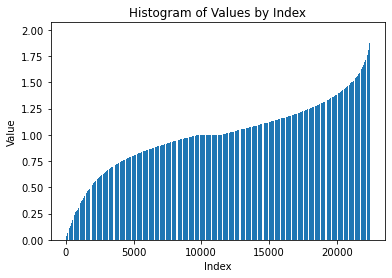

In [90]:
# Plot histogram
# Extract the first elements from the list of tuples
values = [t[0] for t in e]

# Indices for the x-axis
indices = list(range(len(values)))

# Plot the histogram as a bar chart
plt.bar(indices, values)

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Histogram of Values by Index')

# Show the plot
plt.show()


In [103]:
# Sample data: list of tuples
#data = [(1, 'a'), (2, 'b'), (3, 'c'), (3, 'd'), (4, 'e'), (4, 'f'), (4, 'g'), (5, 'h'), (5, 'i'), (5, 'j'), (5, 'k')] * 10  # extended to ensure more than 100 items

# Extract the first elements from the list of tuples
values = [t[0] for t in e]

# Calculate the differences between consecutive elements
differences = [(abs(values[i] - values[i - 1]), i - 1, i) for i in range(1, len(values))]

# Sort the differences by the gap size in descending order
sorted_differences = sorted(differences, key=lambda x: x[0], reverse=True)

# Get the top 100 maximum differences
top_100_differences = differences[:100]

# Print the results
i=0
for diff, index1, index2 in top_100_differences:
    print(f"Difference ",i,":", {diff}, "Indices: {index1} and {index2}")
    i+=1


Difference  0 : {0.004439778655240867} Indices: {index1} and {index2}
Difference  1 : {0.003502167982470144} Indices: {index1} and {index2}
Difference  2 : {0.0002773164526800702} Indices: {index1} and {index2}
Difference  3 : {0.00024435584706749246} Indices: {index1} and {index2}
Difference  4 : {0.0008524304780360755} Indices: {index1} and {index2}
Difference  5 : {0.0003047731900618633} Indices: {index1} and {index2}
Difference  6 : {0.002086868970447143} Indices: {index1} and {index2}
Difference  7 : {0.00032464122238431807} Indices: {index1} and {index2}
Difference  8 : {0.0014055113817260968} Indices: {index1} and {index2}
Difference  9 : {0.0008851470339137808} Indices: {index1} and {index2}
Difference  10 : {0.0008931744515558986} Indices: {index1} and {index2}
Difference  11 : {0.0003215595440318481} Indices: {index1} and {index2}
Difference  12 : {0.0025731237028905948} Indices: {index1} and {index2}
Difference  13 : {0.0008105043095876924} Indices: {index1} and {index2}
Dif

In [104]:
with open('differences.txt', 'w') as file:
    for diff in differences:
        file.write(f'{diff}\n')

In [109]:
import networkx as nx
import Louvain_algo

Algo = Louvain_algo.Louvain_algo(graph)
community_dict = Algo.run()

# Function to calculate intra-density of a community
def calculate_intra_density(G, community_nodes):
    subgraph = G.subgraph(community_nodes)
    num_edges_within = subgraph.number_of_edges()
    num_nodes = len(community_nodes)
    total_possible_edges = num_nodes * (num_nodes - 1) / 2
    return num_edges_within / total_possible_edges if total_possible_edges > 0 else 0




TypeError: unhashable type: 'set'

In [ ]:
# Function to calculate inter-density between two communities
def calculate_inter_density(G, community_nodes1, community_nodes2):
    num_edges_between = 0
    for node1 in community_nodes1:
        for node2 in community_nodes2:
            if G.has_edge(node1, node2):
                num_edges_between += 1
    total_possible_edges_between = len(community_nodes1) * len(community_nodes2)
    return num_edges_between / total_possible_edges_between if total_possible_edges_between > 0 else 0

In [ ]:
# Calculate intra-density for each community
intra_densities = {}
for community, nodes in community_dict.items():
    intra_densities[community] = calculate_intra_density(graph, nodes)

# Calculate inter-density between each pair of communities
inter_densities = {}
for community1, nodes1 in community_dict.items():
    for community2, nodes2 in community_dict.items():
        if community1 < community2:  # To avoid duplicate calculations and self-comparisons
            inter_densities[(community1, community2)] = calculate_inter_density(graph, nodes1, nodes2)

print("Intra-densities:", intra_densities)
print("Inter-densities:", inter_densities)

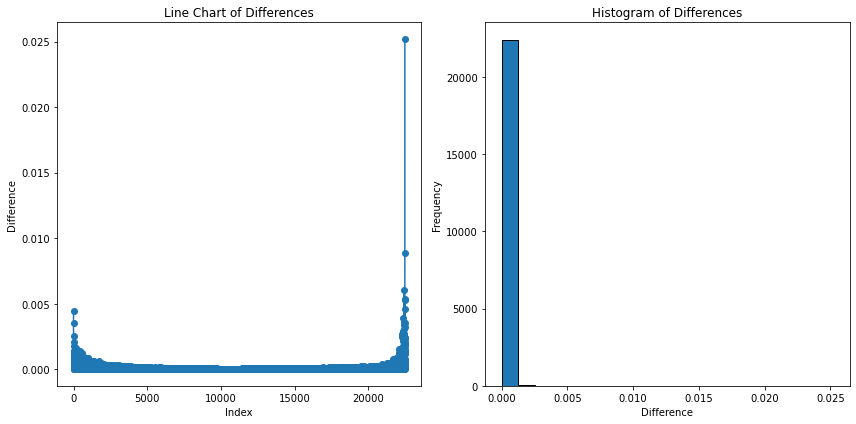

In [100]:
import matplotlib.pyplot as plt

# Sample data: list of tuples
#data = [(1, 'a'), (2, 'b'), (3, 'c'), (3, 'd'), (4, 'e'), (4, 'f'), (4, 'g'), (5, 'h'), (5, 'i'), (5, 'j'), (5, 'k')] * 10  # extended to ensure more than 100 items

# Extract the first elements from the list of tuples
values = [t[0] for t in e]

# Calculate the differences between consecutive elements
differences = [abs(values[i] - values[i - 1]) for i in range(1, len(values))]

# Get the indices of the differences
indices = range(1, len(values))

# Plot the line chart for differences
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(indices, differences, marker='o')
plt.title('Line Chart of Differences')
plt.xlabel('Index')
plt.ylabel('Difference')

# Plot the histogram for differences
plt.subplot(1, 2, 2)
plt.hist(differences, bins=20, edgecolor='black')
plt.title('Histogram of Differences')
plt.xlabel('Difference')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


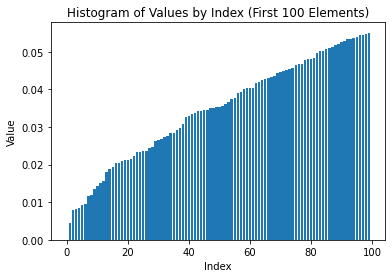

In [98]:
import matplotlib.pyplot as plt

# Sample data: list of tuples
#data = [(1, 'a'), (2, 'b'), (3, 'c'), (3, 'd'), (4, 'e'), (4, 'f'), (4, 'g'), (5, 'h'), (5, 'i'), (5, 'j'), (5, 'k')] * 10  # extended to ensure more than 100 items

# Extract the first 100 elements from the list of tuples
data_first_100 = e[:100]

# Extract the first elements from the list of tuples
values = [t[0] for t in data_first_100]

# Indices for the x-axis
indices = list(range(len(values)))

# Plot the histogram as a bar chart
plt.bar(indices, values)

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Histogram of Values by Index (First 100 Elements)')

# Show the plot
plt.show()


In [69]:
e = sorted(e, reverse=False)
fig = px.histogram(e, x="Eigenvalue Index",title="Sorted Eigenvalues Histogram")
fig.show()

AttributeError: module 'plotly' has no attribute 'histogram'

In [67]:
#explore to 1000 nodes and add betweeneess value
#nodes  = nodes.dropna()
top_1000_nodes = nodes.nlargest(1000, columns=['betweenness_centerality']).sort_values(['betweenness_centerality'],ascending=[False])
top_1000_nodes.head(20)

,id,facebook_id,page_name,page_type,degree_centerality,betweenness_centerality,closeness_centrality,community_id
701,701,20531316728,Facebook,company,0.016858,0.112787,0.324158,22
11003,11003,6815841748,Barack Obama,politician,0.015640,0.087307,0.316438,28
21729,21729,63811549237,The Obama White House,government,0.030625,0.039259,0.317475,28
19743,19743,1191441824276882,The White House,government,0.031515,0.039249,0.317413,28
21120,21120,178362315106,European Parliament,government,0.019152,0.025691,0.286927,46
17983,17983,5550296508,CNN,company,0.007633,0.022942,0.302080,28
8482,8482,146599018696771,NATO,government,0.010302,0.019590,0.297469,30
20415,20415,741724592531706,Joachim Herrmann,politician,0.014329,0.018781,0.272074,44
22171,22171,38802554124,U.S. Embassy Ottawa,government,0.015359,0.017106,0.303557,28
10379,10379,15877306073,U.S. Department of State,government,0.021868,0.015799,0.302027,28


In [47]:
top_1000_nodes = top_1000_nodes.assign(bet_id=1)
top_1000_nodes

,id,facebook_id,page_name,page_type,degree_centerality,betweenness_centerality,closeness_centrality,community_id,bet_id
701,701,20531316728,Facebook,company,0.016858,0.112787,0.324158,22,1
11003,11003,6815841748,Barack Obama,politician,0.015640,0.087307,0.316438,28,1
21729,21729,63811549237,The Obama White House,government,0.030625,0.039259,0.317475,28,1
19743,19743,1191441824276882,The White House,government,0.031515,0.039249,0.317413,28,1
21120,21120,178362315106,European Parliament,government,0.019152,0.025691,0.286927,46,1
...,...,...,...,...,...,...,...,...,...
8520,8520,326880764060154,愛台客-Iset,tvshow,0.000843,0.000768,0.175360,16,1
3073,3073,38798304057,"Norfolk District, U.S. Army Corps of Engineers",government,0.007258,0.000767,0.273229,30,1
5271,5271,141040782621821,Danse avec les stars,tvshow,0.000609,0.000765,0.189095,21,1
8129,8129,137369343031973,ABB,company,0.001452,0.000765,0.224973,31,1


In [48]:
top_1000_nodes = top_1000_nodes[['id','bet_id']]

In [32]:
top_1000_nodes

,id,bet_id
701,701,1
11003,11003,1
21729,21729,1
19743,19743,1
21120,21120,1
...,...,...
8520,8520,1
3073,3073,1
5271,5271,1
8129,8129,1


In [50]:

joined = nodes.merge(top_1000_nodes, on='id', how='left')
#joined = nodes.join(top_1000_nodes, lsuffix='_caller', rsuffix='_other')
len(joined)

22470

In [54]:
joined['bet_id'] = joined['bet_id'].fillna(0)

In [57]:
joined.to_csv('joined.csv',index=False)

In [58]:
top_1000_nodes

,id,bet_id
701,701,1
11003,11003,1
21729,21729,1
19743,19743,1
21120,21120,1
...,...,...
8520,8520,1
3073,3073,1
5271,5271,1
8129,8129,1


In [68]:
utils.plot(top_1000_nodes,'page_type',"top ")